In [95]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar

In [97]:
df = pd.read_excel("DataMDNonTidalWLBWDB137ATSVALUE_UPDATEDmax, minMonthlyFull.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [98]:
df = df.sort_values(by = ["YEAR","MONTH"])

In [99]:
monthly = df.groupby("MONTH").agg({'MAXOFTSVALUE_UPDATED': 'max',
                                                   'MINOFTSVALUE_UPDATED': 'min'
                                                   })

In [100]:
monthly = monthly.reset_index()
monthly['MONTH'] = monthly['MONTH'].apply(lambda x: calendar.month_abbr[x])


In [101]:
monthly.columns = ["Month", "Maximum","Minimum"]

In [102]:
month_order = ["Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"]
monthly = monthly.set_index(monthly["Month"]).loc[month_order]

In [103]:
df.describe()

,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED
count,533.000000,533.000000,533.000000,533.000000
mean,1986.840525,6.523452,5.250619,4.012064
std,13.128160,3.440405,2.529199,2.048119
min,1964.000000,1.000000,1.770000,1.560000
25%,1976.000000,4.000000,2.680000,2.260000
50%,1987.000000,7.000000,4.940000,3.160000
75%,1998.000000,9.000000,7.740000,5.720000
max,2009.000000,12.000000,10.370000,9.610000


In [104]:
df.nlargest(1,["MAXOFTSVALUE_UPDATED"])


,STATIONID,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED
488,137A,1988,9,10.37,7.09


In [105]:
df.nsmallest(1,["MINOFTSVALUE_UPDATED"])

,STATIONID,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED
375,137A,2006,4,2.1,1.56


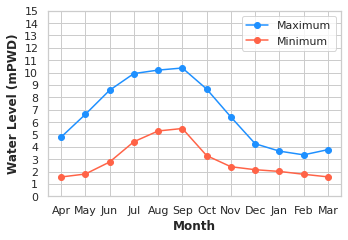

In [106]:
sns.set(rc={'figure.figsize':(5,3.5)})
sns.set_style("whitegrid")

fig, ax = plt.subplots()
ax = plt.plot(monthly["Maximum"], color = 'dodgerblue',marker = 'o', label = "Maximum")
ax = plt.plot(monthly["Minimum"], color = 'tomato',marker = 'o', label = "Minimum")
plt.legend()
plt.yticks(np.arange(0,16,1))

plt.xlabel("Month", fontweight="semibold")
plt.ylabel("Water Level (mPWD)", fontweight="semibold")
plt.tight_layout()
plt.savefig("137A_WL.jpg", dpi = 500)
plt.show()

In [107]:
monthly.to_excel("137A_monthly.xlsx")